In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_vuelos = pd.read_csv('../files/Customer_Flight_Activity.csv')
df_vuelos.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
df_clientes = pd.read_csv('../files/Customer_Loyalty_History.csv')
df_clientes.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


EDA Vuelos

In [4]:
df_vuelos.shape

(405624, 10)

In [5]:
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [6]:
df_vuelos['Points Accumulated'].value_counts() #hay valores float, no se puede convertir en int

Points Accumulated
0.00      197992
180.00       763
270.00       734
288.00       717
189.00       709
           ...  
658.50         1
556.25         1
10.80          1
565.50         1
626.00         1
Name: count, Length: 1549, dtype: int64

In [7]:
df_vuelos.describe().T #no hay valores nulos

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


EDA Clientes

In [8]:
df_clientes.shape

(16737, 16)

In [9]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [10]:
df_clientes.isnull().sum()/df_clientes.shape[0]*100 

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [11]:
df_clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [12]:
df_clientes.describe(include='O').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [13]:
df_clientes['Country'].unique() #se puede eliminar ya que todos los clientes son de Canadá

array(['Canada'], dtype=object)

In [14]:
df_clientes['Loyalty Card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [15]:
df_clientes['Enrollment Type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [16]:
df_clientes['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [17]:
df_clientes['Salary'].sort_values().head(26) #para comprobar si hay muchos valores negativos

7373    -58486.0
16735   -57297.0
1082    -49830.0
8767    -49001.0
14327   -47310.0
2471    -46683.0
12596   -46470.0
16431   -46303.0
3575    -45962.0
4712    -43234.0
14355   -39503.0
10232   -34079.0
8576    -31911.0
13564   -26322.0
15416   -19332.0
3932    -19325.0
6570    -17534.0
1894    -12497.0
6560    -10605.0
11635    -9081.0
3243     15609.0
15197    16628.0
14896    16743.0
3471     16853.0
7152     17166.0
12141    17682.0
Name: Salary, dtype: float64

LIMPIEZA DATOS

In [18]:
df_union = df_vuelos.merge(df_clientes, how='left', on='Loyalty Number')

In [19]:
df_union.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [20]:
df_union.shape

(405624, 25)

In [21]:
df_union.duplicated().sum()

1864

In [22]:
df_limpio = df_union.drop_duplicates(keep="last")

In [23]:
df_limpio.duplicated().sum()

0

In [24]:
df_limpio[df_limpio['Loyalty Number'] == 101902].head() #compruebo que no se han eliminado duplicados por Loyalty Number

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
42,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
3479,101902,2018,6,2,2,4,4200,420.0,448,36,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
16943,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
33844,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
50744,101902,2017,4,4,0,4,1460,146.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN


In [25]:
df_limpio.shape

(403760, 25)

In [26]:
lista_columnas = ['Dollar Cost Points Redeemed', 'Country', 'Cancellation Year', 'Cancellation Month', 'Enrollment Year', 'Enrollment Month']

In [27]:
def eliminar_columnas(df, list_cols):
    for c in list_cols:
        df.drop(columns=[c], inplace=True)
        print(f'eliminando columna {c}')

In [28]:
eliminar_columnas(df_limpio, lista_columnas)

eliminando columna Dollar Cost Points Redeemed
eliminando columna Country
eliminando columna Cancellation Year
eliminando columna Cancellation Month
eliminando columna Enrollment Year
eliminando columna Enrollment Month


In [29]:
df_limpio.shape

(403760, 19)

In [30]:
df_limpio.isnull().sum()/df_limpio.shape[0]*100

Loyalty Number              0.000000
Year                        0.000000
Month                       0.000000
Flights Booked              0.000000
Flights with Companions     0.000000
Total Flights               0.000000
Distance                    0.000000
Points Accumulated          0.000000
Points Redeemed             0.000000
Province                    0.000000
City                        0.000000
Postal Code                 0.000000
Gender                      0.000000
Education                   0.000000
Salary                     25.326927
Marital Status              0.000000
Loyalty Card                0.000000
CLV                         0.000000
Enrollment Type             0.000000
dtype: float64

In [31]:
df_limpio['Salary'] = df_limpio['Salary'].apply(lambda x: abs(x) if x < 0 else x)

In [32]:
df_limpio['Salary'].min() #comprobación de que ya no hay valores nulos

9081.0

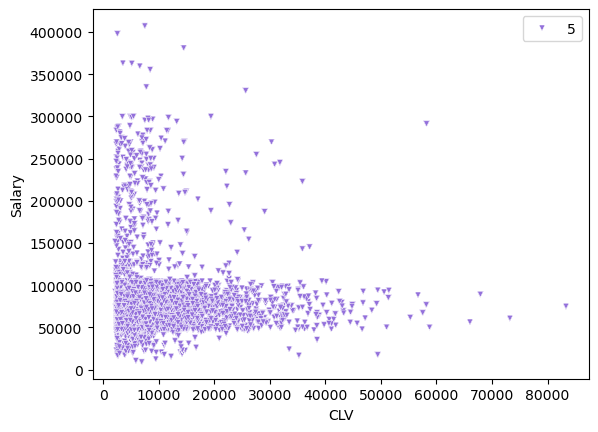

In [33]:
sns.scatterplot(x = 'CLV', y = 'Salary', data = df_limpio, size = 5, marker= 'v', color= 'mediumpurple'); 
# Compruebo si Salary y CLV, Province o Education pueden tener relación para aplicar IterativeImputer o KNNI. 
# Pero no se ve ninguna correlación entre las variables, dejo comprobación solo de la correlación entre Salary y CLV.

VISUALIZACIÓN

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [34]:
df_vuelos_mes = df_limpio.groupby('Month')['Flights Booked'].sum().reset_index()
df_vuelos_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


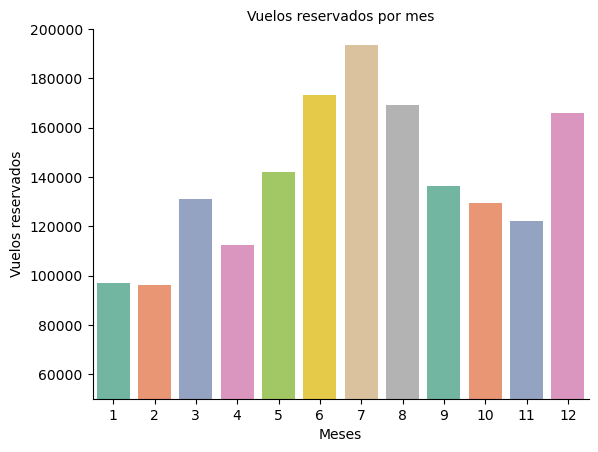

In [35]:
sns.barplot(x='Month', y='Flights Booked', data=df_vuelos_mes, palette='Set2')
plt.ylim([50000, 200000])
plt.xlabel('Meses') 
plt.ylabel('Vuelos reservados')
plt.title('Vuelos reservados por mes', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False);

Conclusión: el año comienza con pocos vuelos reservados en comparación con el resto del año. Comienzan a aumentar  y se hace especialmente notable este incremento en los meses de mayo a septiembre, con un incremento significativo en los meses de junio, julio y agosto, época en la que se concentra el periodo de vacaciones de verano. A partir de noviembre vuelven a descender ligeramente hasta diciembre que vuelve a haber un incremento considerable, coincidiendo con las navidades, periodo en  el que siempre hay más viajes y desplazamientos.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

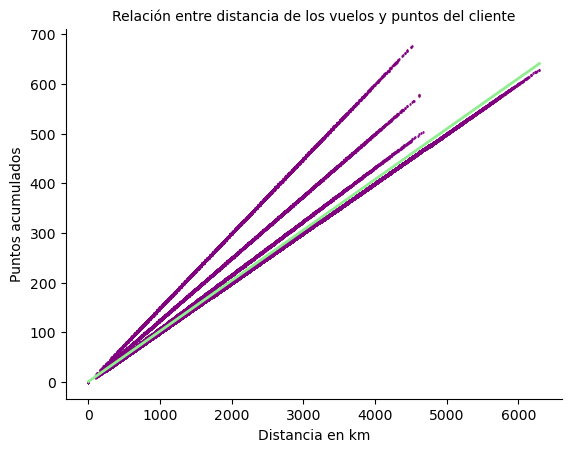

In [36]:
sns.regplot(x = 'Distance', y = 'Points Accumulated', data = df_limpio, marker= 'd', scatter_kws={'color': 'purple', 's': 1}, line_kws={'color': 'lightgreen', 'linewidth': 2})
plt.xlabel('Distancia en km') #Canadá usa el sistema métrico decimal para medir distancias
plt.ylabel('Puntos acumulados')
plt.title('Relación entre distancia de los vuelos y puntos del cliente', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False);

Conclusión: se aprecia una evidente correlación entre ambas variables. A mayor distancia recorrida en vuelos, mayor es el número de puntos acumulados por el cliente.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [37]:
df_clientes_provincia = df_limpio.groupby('Province')['Loyalty Number'].nunique().reset_index()

In [38]:
df_clientes_provincia

,Province,Loyalty Number
0,Alberta,969
1,British Columbia,4409
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,258
5,Nova Scotia,518
6,Ontario,5404
7,Prince Edward Island,66
8,Quebec,3300
9,Saskatchewan,409


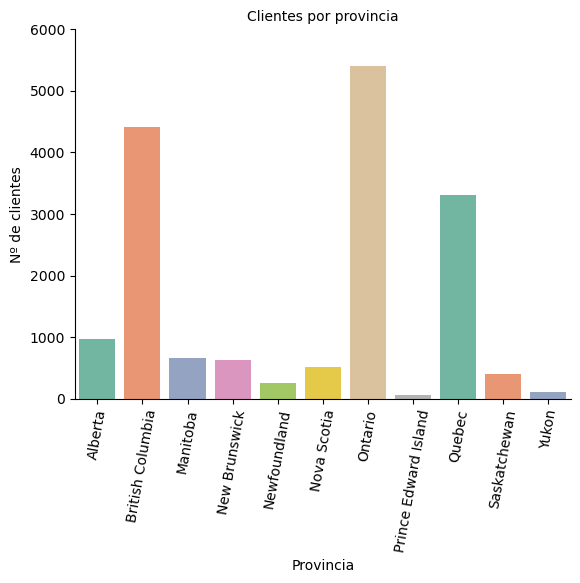

In [39]:
sns.barplot(x='Province', y='Loyalty Number', data=df_clientes_provincia, palette='Set2')
plt.xticks(rotation=80)
plt.ylim([0, 6000])
plt.xlabel('Provincia') 
plt.ylabel('Nº de clientes')
plt.title('Clientes por provincia', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False);

Conclusión: se aprecia una gran diferencia entre las diferentes provincias. Las provincias más pobladas tienen un mayor número de clientes.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [40]:
df_salario_educacion = df_limpio.groupby('Education')['Salary'].mean().reset_index()
df_salario_educacion

,Education,Salary
0,Bachelor,72599.080913
1,College,NaN
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


In [41]:
df_limpio[(df_limpio['Education'] == 'College') & (df_limpio['Salary'] > 0)].loc[:,['Education', 'Salary']] 
#No hay información del salario de los clientes que tienen un título universitario

,Education,Salary


In [ ]:
#compruebo si hay nulos en los demás niveles de educación
df_limpio['Education'][df_limpio['Education'] == 'Bachelor'].isnull().sum()

0

In [47]:
df_limpio['Education'][df_limpio['Education'] == 'Doctor'].isnull().sum()

0

In [ ]:
df_limpio['Education'][df_limpio['Education'] == 'High School or Below'].isnull().sum()

0

In [51]:
df_limpio['Education'][df_limpio['Education'] == 'Master'].isnull().sum()

0

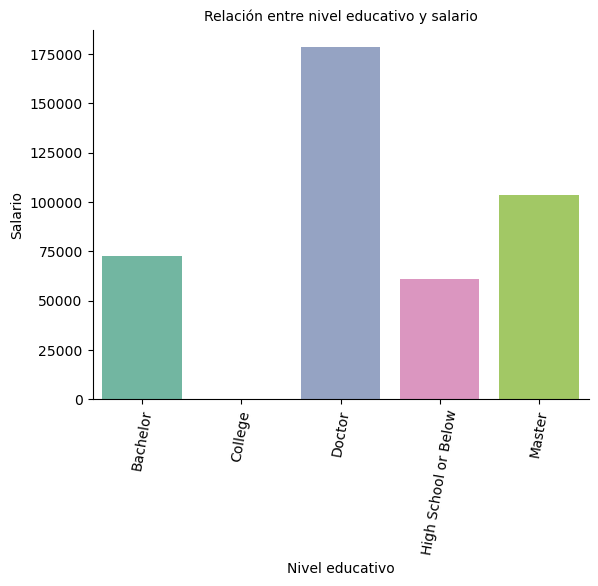

In [56]:
sns.barplot(x = 'Education', y = 'Salary', data = df_salario_educacion, palette='Set2')
plt.xlabel('Nivel educativo') 
plt.ylabel('Salario')
plt.title('Relación entre nivel educativo y salario', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation=80);

Conclusión: para College todos los valore son nulos. Para los demás niveles se aprecia una correlación entre el nivel de estudio y el salario: a mayor nivel de estudios mayor es el salario. Se podría entender que College también cumpliría este patrón pero no podemos afirmarlo.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [59]:
df_tarjetas_fidelidad = df_limpio.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index()
df_tarjetas_fidelidad

,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


''

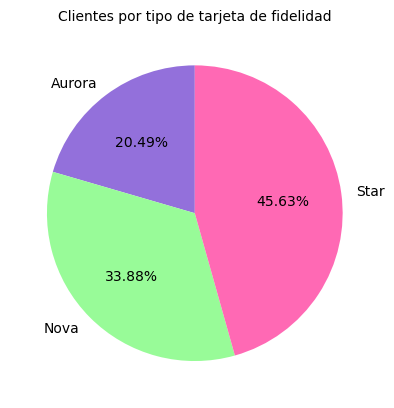

In [81]:
plt.pie('Loyalty Number', labels='Loyalty Card', data=df_tarjetas_fidelidad, autopct = '%1.2f%%', colors=['mediumpurple', 'palegreen', 'hotpink'], startangle=90, textprops={'fontsize': 10})
plt.title('Clientes por tipo de tarjeta de fidelidad', fontsize = 10)
;

Conclusión: casi la mitad de los clientes tiene la tarjeta Start (45,63%), seguido por la tarjeta Nova (33,88%) y la que menor porcentaje de clientes tiene es la Aurora (20,49%).

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

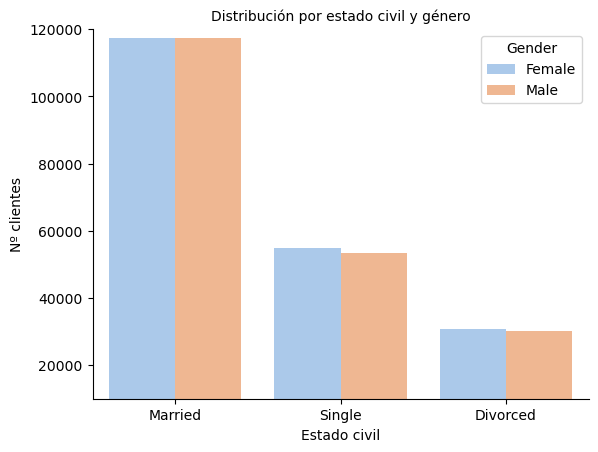

In [95]:
sns.countplot(x='Marital Status', data=df_limpio, palette='pastel', hue='Gender')
plt.xlabel('Estado civil') 
plt.ylabel('Nº clientes')
plt.title('Distribución por estado civil y género', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.ylim([10000, 120000]);

In [98]:
tabla_contingencia = round(pd.crosstab(df_limpio['Marital Status'], df_limpio['Gender'], normalize=True) * 100, 2)
tabla_contingencia

Gender,Female,Male
Marital Status,,
Divorced,7.59,7.46
Married,29.07,29.10
Single,13.56,13.22


Conclusión: podemos ver que por género no hay apenas diferencia en el estado civil. Entre los diferentes tipos de estado civil sí se aprecia una gran diferencia, especialmente entre los casados que suponen más de la mitad de los clientes, casi un 60%, seguido de los solteros y los divorciados.